In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
imagesdata = pd.read_csv("/Users/alex/Documents/GitHub/IDI/CV/data_raw/clothing-dataset-1/images.csv")

In [4]:
imagesdata

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,204,Shorts,False
5399,befa14be-8140-4faf-8061-1039947e329d,204,Body,True
5400,5379356a-40ee-4890-b416-2336a7d84061,310,Shorts,False
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,204,Shoes,False


In [13]:
imagesdata.groupby(['kids']).count()

,image,sender_id,label
kids,,,
False,4927,4927,4927
True,476,476,476


In [18]:
imagesdata.groupby(['label']).count()

,image,sender_id,kids
label,,,
Blazer,109,109,109
Blouse,23,23,23
Body,69,69,69
Dress,357,357,357
Hat,171,171,171
Hoodie,100,100,100
Longsleeve,699,699,699
Not sure,228,228,228
Other,67,67,67


Text(0.5, 1.0, 'Kids clothing distribution')

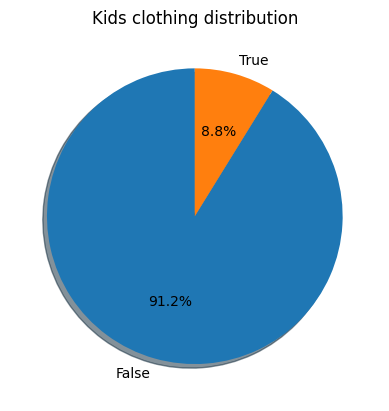

In [16]:
plt.pie(imagesdata.groupby(['kids']).count()['image'], labels=imagesdata.groupby(['kids']).count().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Kids clothing distribution")

Text(0.5, 1.0, 'Kids clothing distribution')

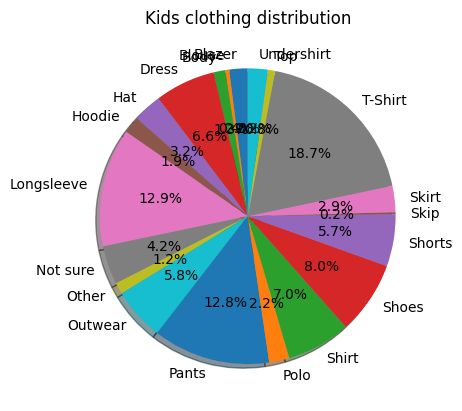

In [19]:
plt.pie(imagesdata.groupby(['label']).count()['image'], labels=imagesdata.groupby(['label']).count().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Kids clothing distribution")